### Homework 3.6 - Voice Changer

We will try to make a simple voice changer by manipulating the frequency domain.

In this problem, you will have to make a short vocal record of about 10-15 seconds (no noise). Play around with the frequency domain to change the pitch of the audio and then invert it back to time domain in order to test the new voice. Make at least 2 new different voices.

**You must show all the steps clearly. Write your explanation in the markdown boxes.**

In [159]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import rfft, rfftfreq ,irfft

### Get sound

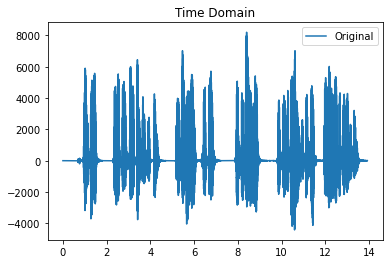

In [160]:
freq, y = wavfile.read('images/FrenchOralAssignment1.wav')
y = y[:,0]
dt = 1/freq
t = np.linspace(0, (len(y)-1)*dt, len(y))
plt.plot(t, y, label='Original')
plt.title('Time Domain')
plt.legend()

### Fourier transform sound

([<matplotlib.lines.Line2D at 0x241c270b100>],
 array([0.20283985, 0.0533856 , 0.10025627, ..., 0.00040216, 0.0012632 ,
        0.00559754]),
 array([-1.24539000e+05    +0.j        ,  2.70451681e+02+32776.41723263j,
         2.68302711e+04+55400.00256784j, ...,
         6.70933146e+00  +246.82646313j,  7.97857982e+01  +771.46193882j,
        -6.13390140e+02 +3381.58204579j]))

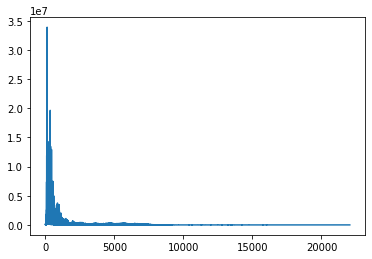

In [161]:
fourier = rfft(y)
f = rfftfreq(len(y),dt)
plt.plot(f, abs(fourier), label='fft'),abs(fourier)/len(y),fourier

### Create a mask, then shift the masked sound in frequency space

In [162]:
threshold1 = 0e7
threshold2 = 4e7
voicemask = np.where(np.logical_and(abs(fourier) > threshold1,abs(fourier) < threshold2 ) , 1 ,0)
changed_voice = voicemask * fourier

delta1 = (-100 + 100*2**-1)/f.max()*len(fourier)
delta2 = (-100 + 100*2**2)/f.max()*len(fourier) 


shift1 = np.hstack((changed_voice[int(-delta1) :],(changed_voice[: int(-delta1)])))
shift2 = np.hstack((changed_voice[int(-delta2) :],(changed_voice[: int(-delta2)])))

In [164]:
voicechanger1 = irfft(shift1)
wavfile.write('voice changer1.wav', freq, np.array(voicechanger1, dtype=np.int16))
voicechanger2 = irfft(shift2)
wavfile.write('voice changer2.wav', freq, np.array(voicechanger2, dtype=np.int16))